# Insurance Claim Fraud Detection


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Exploration and Preprocessing

In [2]:
# Loading the Dataset
df=pd.read_csv("insurance.csv")

# To display all the columns present in the dataset
pd.set_option('display.max_columns',None)

# Printing the first 5 rows of the dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


#### Task:
- Our task is to create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [3]:
# checking the number of rows and columns in the dataset.
df.shape

(1000, 40)

- In our dataset, we have 1000 rows and 40 columns including our target variable "fraud_reported".

In [4]:
# columns in the dataset
df.columns.values

array(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported', '_c39'], dtype=object)

In [5]:
# getting some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- In our dataset, we have 21 columns with object type values, 17 with integer values and 2 columns having float values.
- Except for one column "_c39", there are no null values for other 39 columns. However we have observed some question mark entries.

In [6]:
# converting the ? values to NaN
df.replace({"?":np.nan},inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
# checking the unique value counts for each column
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

- policy_number and incident_location have 1000 unique values whereas _c39 has 0 unique values.
- These columns can be deleted as they won't have impact on model building.

In [8]:
# checking the missing value counts for each columns
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- We have missing values for the columns : collision_type, property_damage, police_report_available, _c39.
- We can delete the_c39 column as all are NaN values. 
- We will fill the other columns NaN values either using Mode or on basis of other relevant column.

In [9]:
# Dropping column _c39
df.drop(["_c39"],axis=1,inplace=True)

In [10]:
# Statistical information
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


#### Observations:
- For the numerical columns we have no NaN values.
- Mean and median are close to each other for almost all the continuous values, that means the distribution is normal.
- We see a difference between 75th percentile and max values for months_as_customer,policy_annual_premium,capital-gains,total_claim_amount,injury_claim,property_claim,vehicle_claim. There could be outliers present.

### Fraud Claim Ratio - Target Variable

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

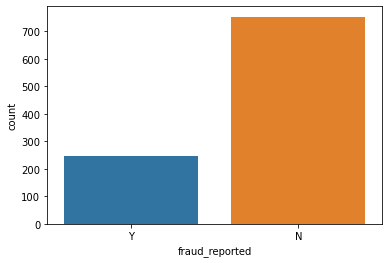

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(df["fraud_reported"])

In [12]:
# checking the value percentage
df["fraud_reported"].value_counts()/len(df["fraud_reported"])*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

#### Observations:
- Data is highly imbalanced,ratio 75:25
- So we analyze the data with other features while taking the target values seperately to get some insights.

In [13]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

### Treating Missing Values

We have missing values for the columns:
   - collision_type
   - property_damage
   - police_report_available

All these are categorical columns and we can replace the missing values with the Mode.

In [14]:
# collision_type
df["collision_type"]=df["collision_type"].fillna(df["collision_type"].mode()[0])

# property_damage
df["property_damage"]=df["property_damage"].fillna(df["property_damage"].mode()[0])

# police_report_available
df["police_report_available"]=df["police_report_available"].fillna(df["police_report_available"].mode()[0])

- Let's check the missing values now! 

In [15]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

- Great! All the missing values are filled!

## Exploratory Data Analysis

### A] Univariate Analysis

<AxesSubplot:xlabel='policy_state', ylabel='count'>

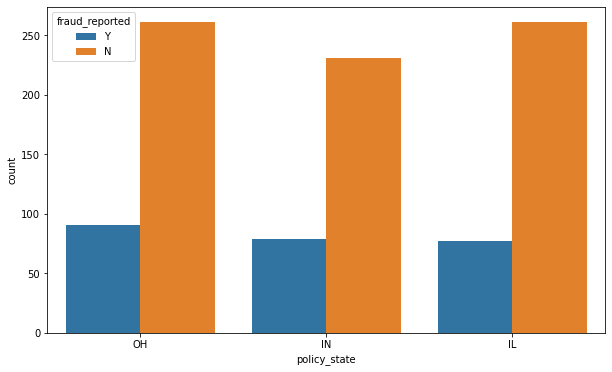

In [16]:
# policy_state vs fraud_reported
plt.figure(figsize=(10,6))
sns.countplot(x="policy_state",hue="fraud_reported",data=df)

#### Observation:
- Fraud claim ratio is highest for the states IN and OH.

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

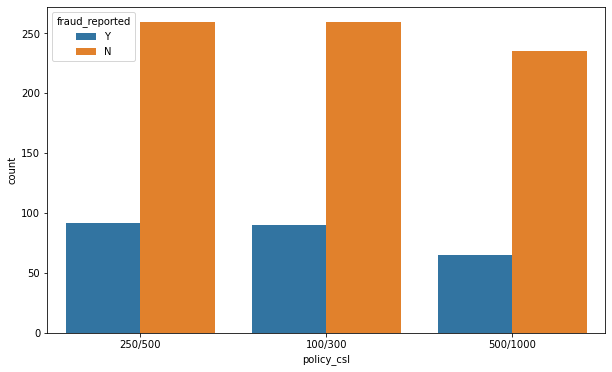

In [17]:
# policy_csl vs fraud_reported
plt.figure(figsize=(10,6))
sns.countplot(x="policy_csl",hue="fraud_reported",data=df)

#### Observation:
- Fraud claim ratio is highest for the Combined Single limits of 250/500 and 100/300.

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

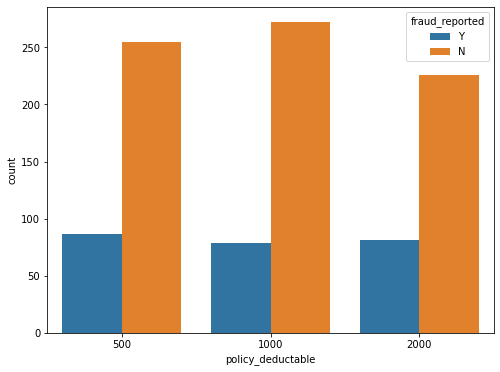

In [18]:
# policy_deductable vs fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(x="policy_deductable",hue="fraud_reported",data=df)

#### Observation:
- Fraud Claim ratio is highest for the insurance having policy_deductable as 2000.

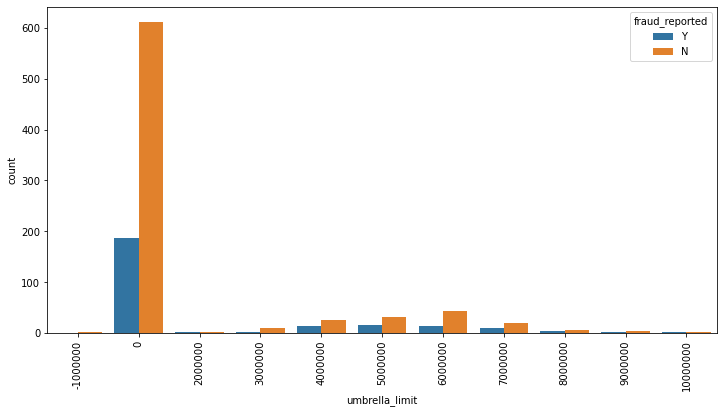

In [19]:
# umbrella_limit vs fraud_reported
plt.figure(figsize=(12,6))
sns.countplot(x="umbrella_limit",hue="fraud_reported",data=df)
plt.xticks(rotation=90);

#### Observation:
- There are majority of the Fraud Claim cases for the umbrella_limit zero.
- Fraud Claim ratio is highest for umbrella_imit 2000000 and 10000000.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

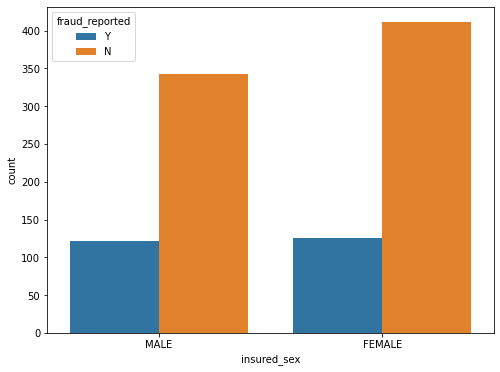

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x="insured_sex",hue="fraud_reported",data=df)

#### Observation:
- Fraud claim ratio is highest for Males that means majority of the Fraud claims are done by Males.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

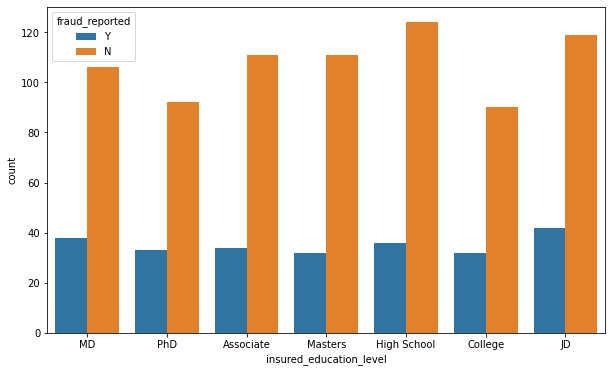

In [21]:
# insured_education_level vs fraud_reported
plt.figure(figsize=(10,6))
sns.countplot(x="insured_education_level",hue="fraud_reported",data=df)

#### Observation:
- Surprisingly we observe that Fraud claim ratio is highest for the people having highest degree of education that is PhD, JD and MD. Also its highest for the people having college degree.

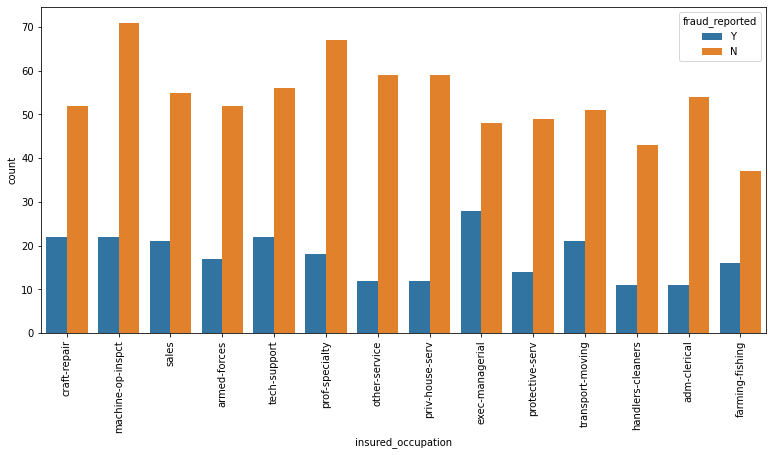

In [22]:
# insured_occupation vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="insured_occupation",hue="fraud_reported",data=df)
plt.xticks(rotation=90);

#### Observation:
- Fraud claim ratio is highest for the exec-managerial, craft-repair and farming-fishing people.
- Its least for the adm-clerical, priv-house-serv and other-service.

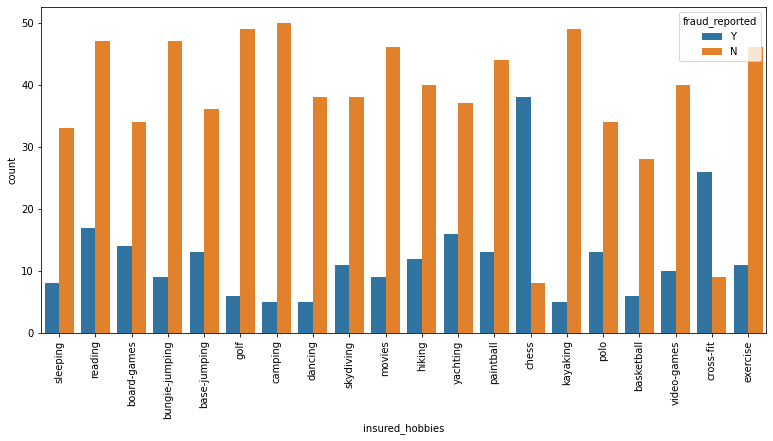

In [23]:
# insured_occupation vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="insured_hobbies",hue="fraud_reported",data=df)
plt.xticks(rotation=90);

#### Observation:
- Fraud claim ratio is highest for the people playing chess and cross-fit.
- Its least for people having kayaking and camping as their hobbies.

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

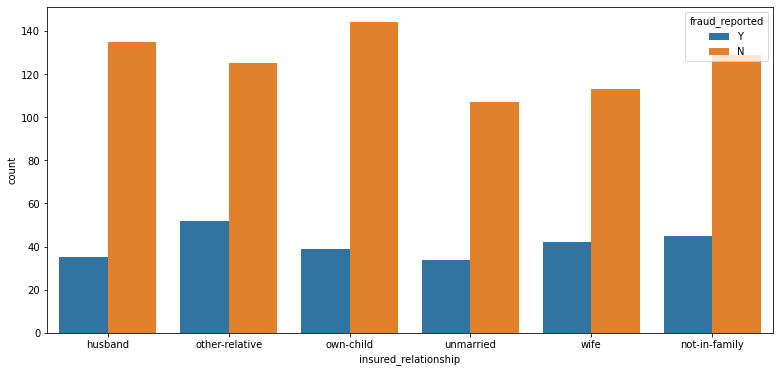

In [24]:
# insured_relationship vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="insured_relationship",hue="fraud_reported",data=df)

#### Observation:
- Fraud claim ratio is highest for the people who are other relative and its least for those who are husbands.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

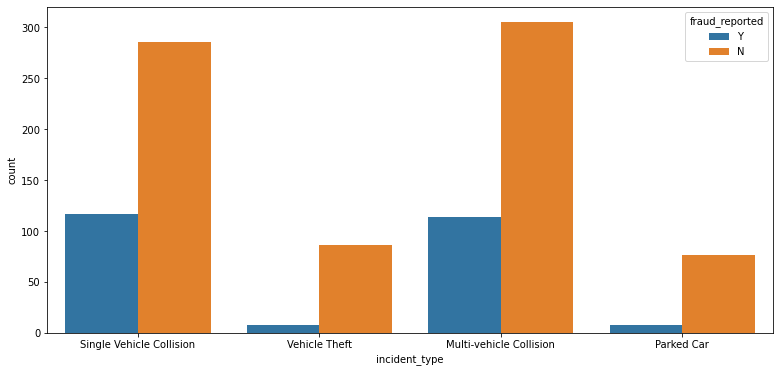

In [25]:
# incident_type vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="incident_type",hue="fraud_reported",data=df)

#### Observation:
- Majority of the Fraud claim insurance are for Single Vehicl Collision type incident. 
- Least number of Fraud Claims are for Vehicle Theft.

<AxesSubplot:xlabel='collision_type', ylabel='count'>

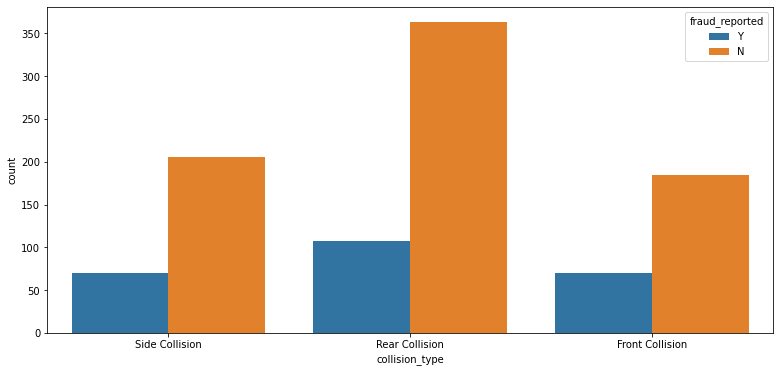

In [26]:
# collision_type vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="collision_type",hue="fraud_reported",data=df)

### Observation:
- Majority of the Fraud Claims filed have Front Collision. 

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

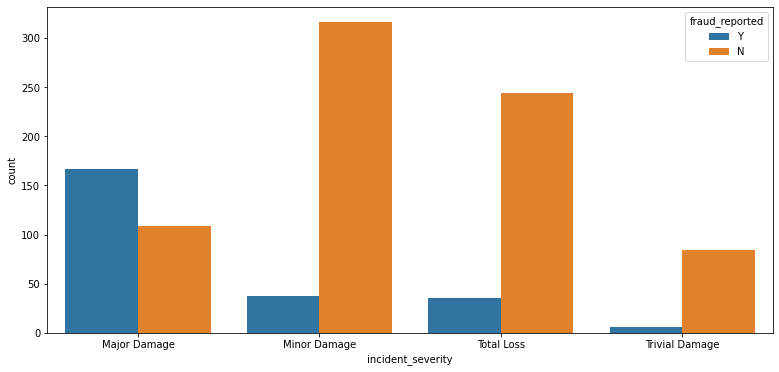

In [27]:
# incident_severity vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="incident_severity",hue="fraud_reported",data=df)

#### Observation:
- Majority of the Fraud Claims have Major Damage.
- Very few Fraud claims have Trivial Damage.

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

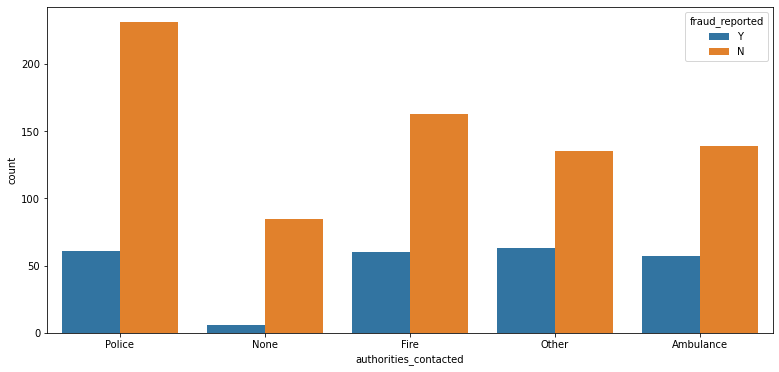

In [28]:
# authorities_contacted vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="authorities_contacted",hue="fraud_reported",data=df)

#### Observation:
- In majority of the Fraud Claim cases, other authorities are contacted.
- For very few cases none of the authorities are contacted.

<AxesSubplot:xlabel='incident_state', ylabel='count'>

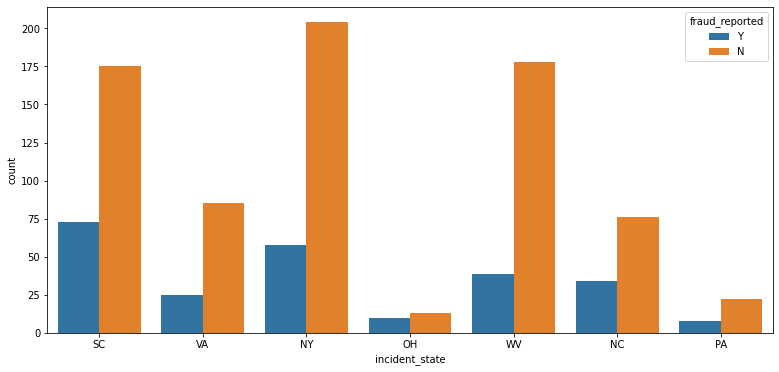

In [29]:
# insured_occupation vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="incident_state",hue="fraud_reported",data=df)

#### Observation:
- Fraud Claim ratio is highest for the OH state and its least for WV state.

<AxesSubplot:xlabel='incident_city', ylabel='count'>

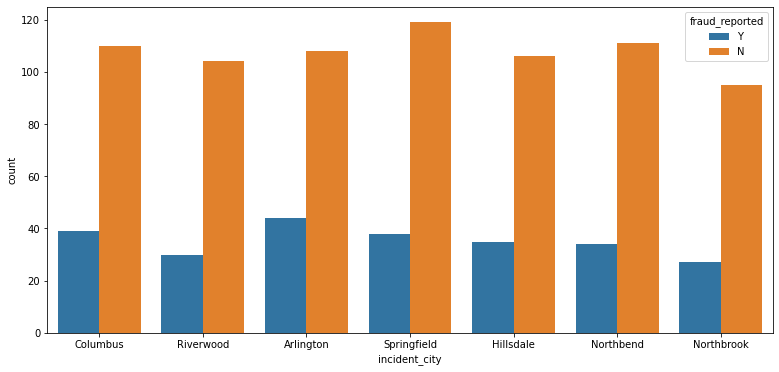

In [30]:
# incident_city vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="incident_city",hue="fraud_reported",data=df)

#### Observation:
- Fraud claim ratio is highest for the Arlington city and its least for Northbrook.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

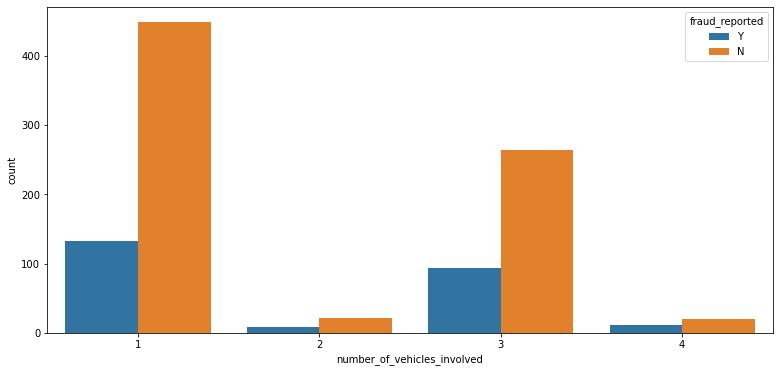

In [31]:
# number_of_vehicles_involved vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="number_of_vehicles_involved",hue="fraud_reported",data=df)

#### Observations:
- In majority of the claim cases number of vehicles involved are one. 
- However, Fraud Claim ratio is highest where 4 vehicles are involved.

<AxesSubplot:xlabel='property_damage', ylabel='count'>

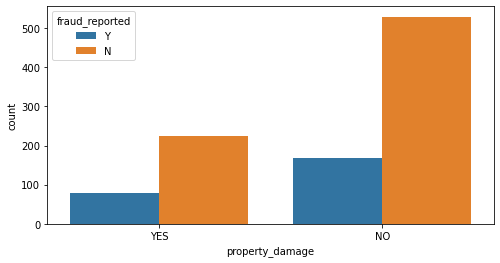

In [32]:
# property_damage vs fraud_reported
plt.figure(figsize=(8,4))
sns.countplot(x="property_damage",hue="fraud_reported",data=df)

#### Observation:
- We observe that in majority of the Fraud Claim cases there is No property damage.

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

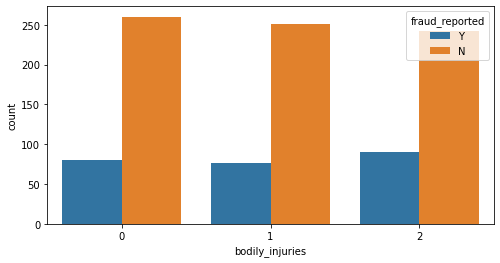

In [33]:
# bodily_injuries vs fraud_reported
plt.figure(figsize=(8,4))
sns.countplot(x="bodily_injuries",hue="fraud_reported",data=df)

#### Observation:
- Fraud claim ratio is highest where bodily_injuries are high that is 2. 

<AxesSubplot:xlabel='witnesses', ylabel='count'>

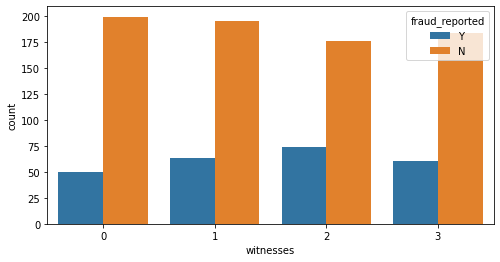

In [34]:
# witnesses vs fraud_reported
plt.figure(figsize=(8,4))
sns.countplot(x="witnesses",hue="fraud_reported",data=df)

#### Observation:
- Fraud claim ratio is highest where witnesses were 2. 

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

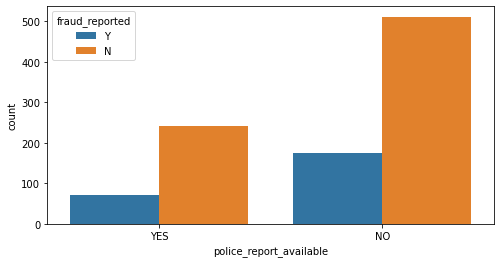

In [35]:
# police_report_available vs fraud_reported
plt.figure(figsize=(8,4))
sns.countplot(x="police_report_available",hue="fraud_reported",data=df)

#### Observation:
- Majority of the Fraud Claim cases are not reported to police. 

<AxesSubplot:xlabel='auto_make', ylabel='count'>

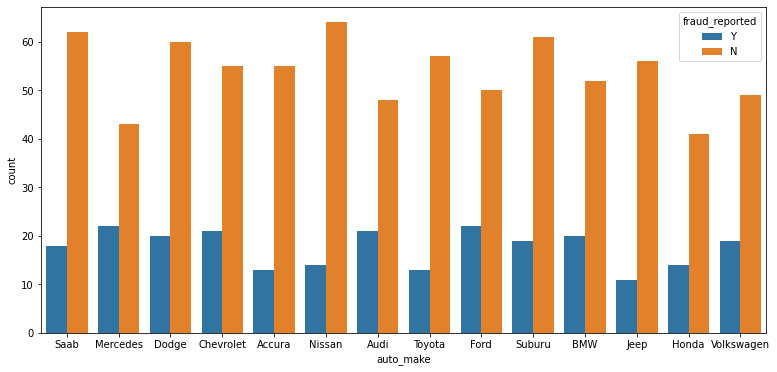

In [36]:
# auto_make vs fraud_reported
plt.figure(figsize=(13,6))
sns.countplot(x="auto_make",hue="fraud_reported",data=df)

#### Observation:
- Fraud claim ratio is highest for Mercedes cars and its least for Jeep and Nissan. 

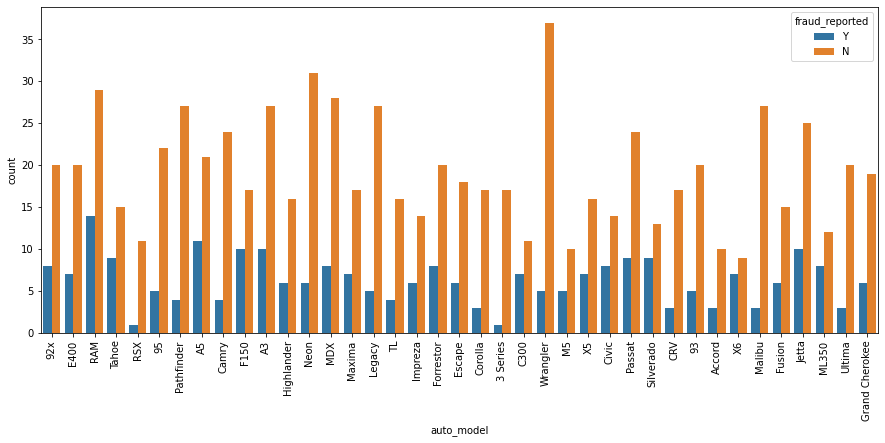

In [37]:
#### auto_model vs fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x="auto_model",hue="fraud_reported",data=df)
plt.xticks(rotation=90);

#### Observation:
- Fraud claim ratio is highest for the models RAM, AS, F150, Tahoe, C300, Civic, Siverado, X6, ML350.
- Its least for Wrangler, Neon, Malibu, Pathfinder, RSX, 3 Series.

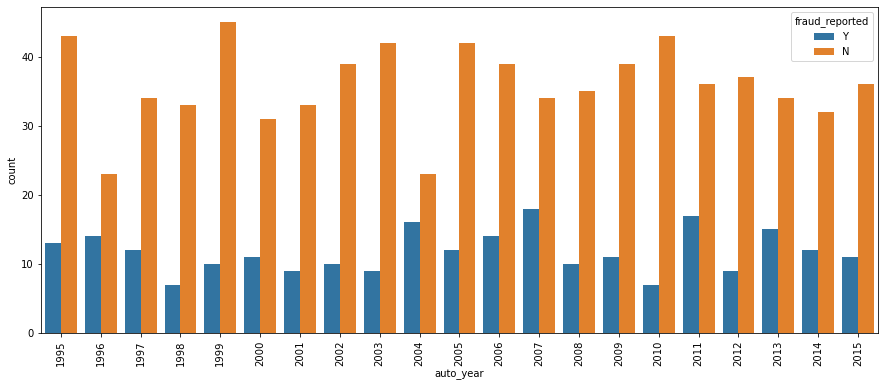

In [38]:
#### auto_model vs fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x="auto_year",hue="fraud_reported",data=df)
plt.xticks(rotation=90);

#### Numerical Columns Analysis

<AxesSubplot:xlabel='months_as_customer'>

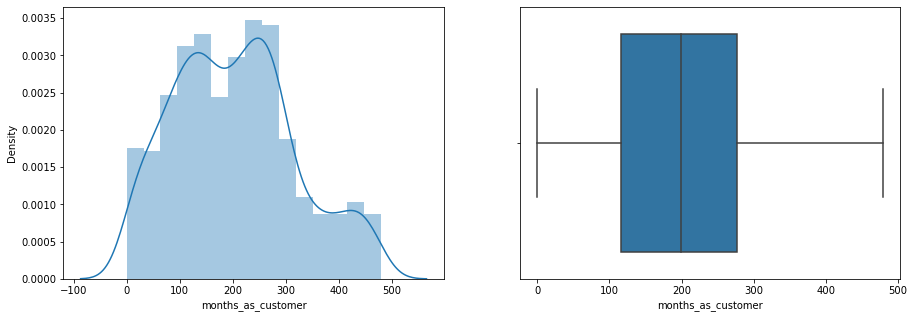

In [39]:
# months_as_customer
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df["months_as_customer"])

plt.subplot(1,2,2)
sns.boxplot(df["months_as_customer"])

#### Observation:
- The distribution is almost normal and there are no outliers present.

<AxesSubplot:xlabel='age'>

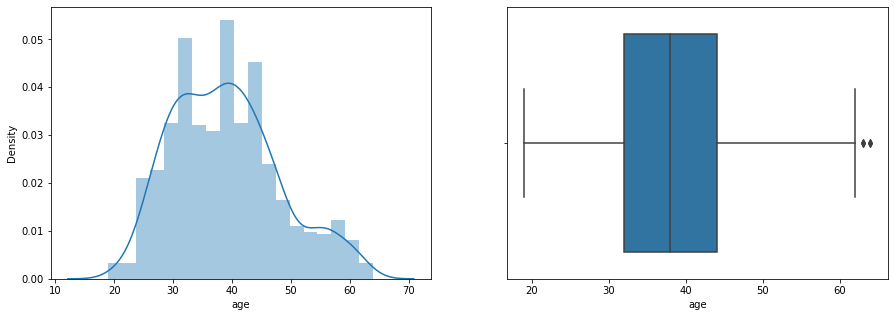

In [40]:
# age
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df["age"])

plt.subplot(1,2,2)
sns.boxplot(df["age"])

#### Observation:
- The distribution is almost normal and there are two outliers present. 

<AxesSubplot:xlabel='capital-gains'>

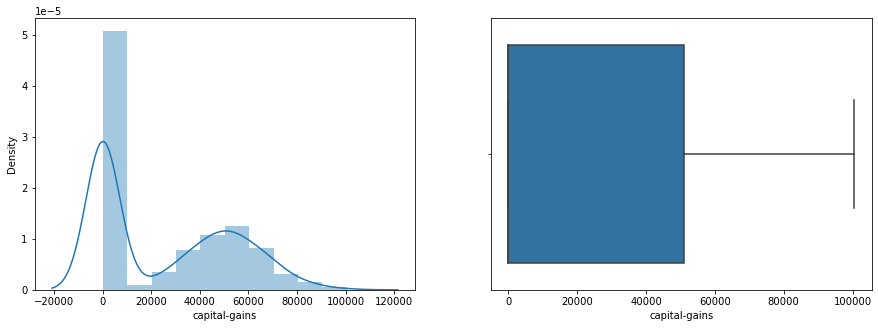

In [41]:
# capital-gains
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df["capital-gains"])

plt.subplot(1,2,2)
sns.boxplot(df["capital-gains"])

#### Observation:
- Here we observe two bell shaped curves that means the distribution is normal.
- There are no outliers present. 

<AxesSubplot:xlabel='capital-loss'>

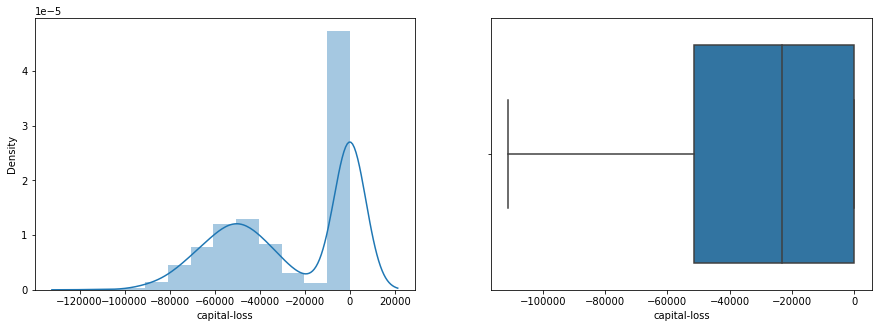

In [42]:
# capital-loss
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df["capital-loss"])

plt.subplot(1,2,2)
sns.boxplot(df["capital-loss"])

#### Observation:
- This is almost opposite to capital gains. There are two bell shaped curves indicating distribution is normal.
- There are no outliers present. 

<AxesSubplot:xlabel='total_claim_amount'>

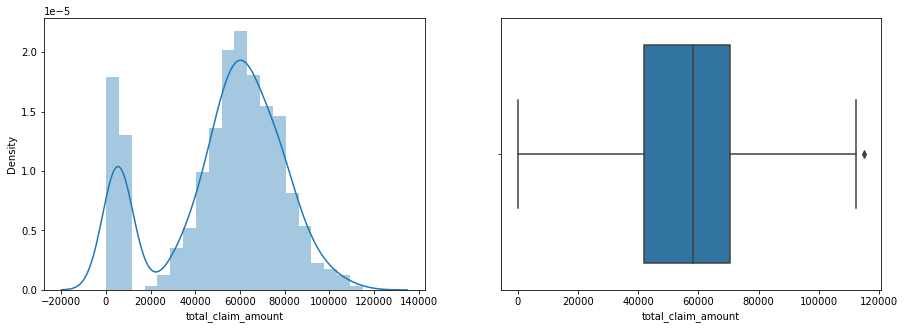

In [43]:
# total_claim_amount
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df["total_claim_amount"])

plt.subplot(1,2,2)
sns.boxplot(df["total_claim_amount"])

#### Observation:
- The distribution is normal and there is just one outlier present. 

<AxesSubplot:xlabel='injury_claim'>

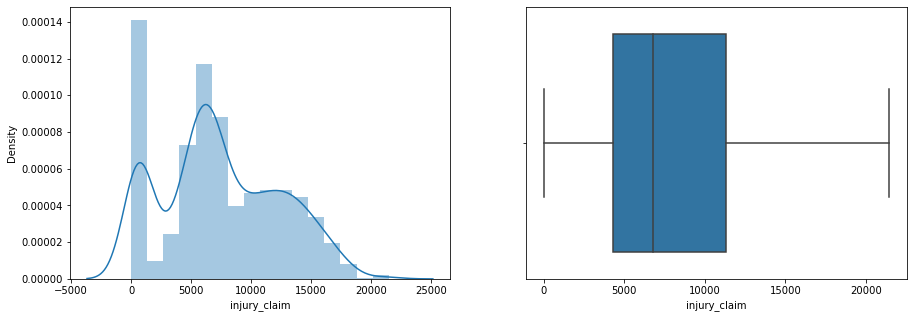

In [44]:
# injury_claim
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df["injury_claim"])

plt.subplot(1,2,2)
sns.boxplot(df["injury_claim"])

#### Observation:
- The distribution is almost normal and there are no outliers present. 

<AxesSubplot:xlabel='property_claim'>

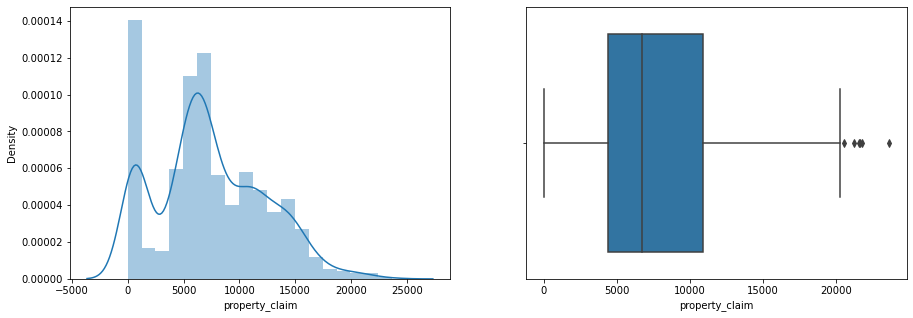

In [45]:
# property_claim
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df["property_claim"])

plt.subplot(1,2,2)
sns.boxplot(df["property_claim"])

#### Observation:
- The distribution is almost normal and there are few outliers present. 

<AxesSubplot:xlabel='vehicle_claim'>

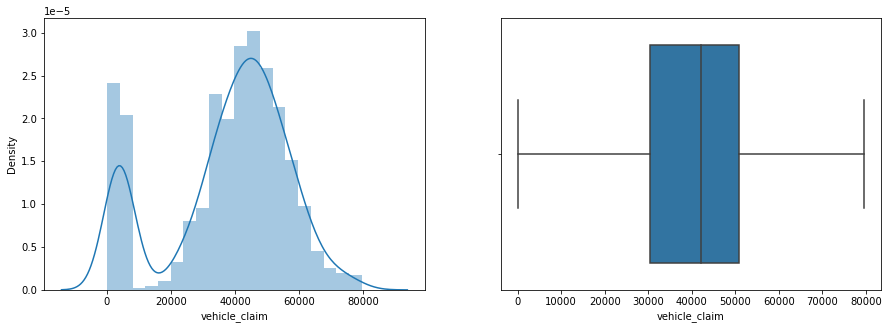

In [46]:
# vehicle_claim
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df["vehicle_claim"])

plt.subplot(1,2,2)
sns.boxplot(df["vehicle_claim"])

#### Observation:
- The distribution is normal and there are no outliers present. 

### B] Bivariate Analysis

Text(0.5, 1.0, 'Total Claim Amount by Fraud')

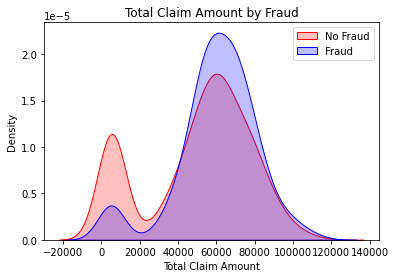

In [47]:
# total_claim_amount vs fraud_reported
Tot=sns.kdeplot(df.total_claim_amount[(df["fraud_reported"]=="N")],color="Red",shade=True)

Tot=sns.kdeplot(df.total_claim_amount[(df["fraud_reported"]=="Y")],ax=Tot,color="Blue",shade=True)

Tot.legend(["No Fraud","Fraud"],loc="upper right")
Tot.set_ylabel("Density")
Tot.set_xlabel("Total Claim Amount")
Tot.set_title("Total Claim Amount by Fraud")

#### Observation:
- Fraud is high when the Total Claim Amount is High. 

Text(0.5, 1.0, 'Annual Premium by Fraud')

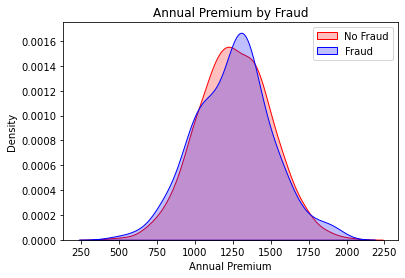

In [48]:

Pol=sns.kdeplot(df.policy_annual_premium[(df["fraud_reported"]=="N")],color="Red",shade=True)

Pol=sns.kdeplot(df.policy_annual_premium[(df["fraud_reported"]=="Y")],ax=Pol,color="Blue",shade=True)

Pol.legend(["No Fraud","Fraud"],loc="upper right")
Pol.set_ylabel("Density")
Pol.set_xlabel("Annual Premium")
Pol.set_title("Annual Premium by Fraud")

#### Observation:
- There is no as such difference between Fraud and Non Fraud cases with respect to annual premium. 

Text(0.5, 1.0, 'Months as Customer by Fraud')

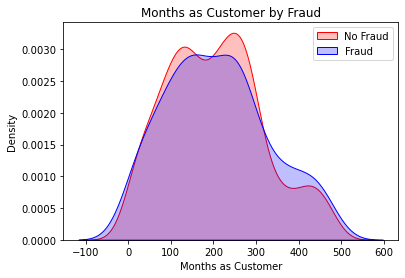

In [49]:
# months_as_customer vs fraud_reported
Mth=sns.kdeplot(df.months_as_customer[(df["fraud_reported"]=="N")],color="Red",shade=True)

Mth=sns.kdeplot(df.months_as_customer[(df["fraud_reported"]=="Y")],ax=Mth,color="Blue",shade=True)

Mth.legend(["No Fraud","Fraud"],loc="upper right")
Mth.set_ylabel("Density")
Mth.set_xlabel("Months as Customer")
Mth.set_title("Months as Customer by Fraud")

#### Observation:
- There is no as such difference between Fraud and Non Fraud cases with respect the months as customer. 

Text(0.5, 1.0, 'Age by Fraud')

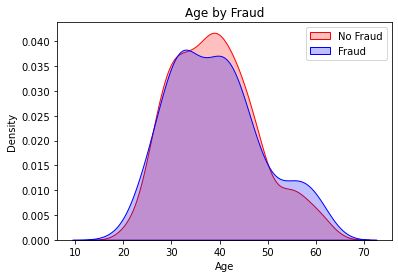

In [50]:
# age vs fraud_reported
Ag=sns.kdeplot(df.age[(df["fraud_reported"]=="N")],color="Red",shade=True)

Ag=sns.kdeplot(df.age[(df["fraud_reported"]=="Y")],ax=Ag,color="Blue",shade=True)

Ag.legend(["No Fraud","Fraud"],loc="upper right")
Ag.set_ylabel("Density")
Ag.set_xlabel("Age")
Ag.set_title("Age by Fraud")

#### Observation:
- To some extent Fraud Claims are not filed by middle aged people. 

Text(0.5, 1.0, 'Injury Claim by Fraud')

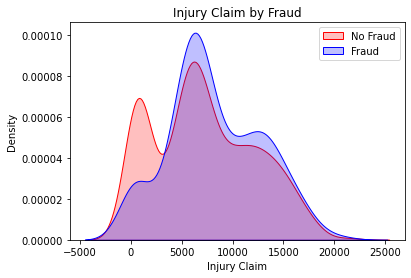

In [51]:
# injury_claim vs fraud_reported
Inj=sns.kdeplot(df.injury_claim[(df["fraud_reported"]=="N")],color="Red",shade=True)

Inj=sns.kdeplot(df.injury_claim[(df["fraud_reported"]=="Y")],ax=Inj,color="Blue",shade=True)

Inj.legend(["No Fraud","Fraud"],loc="upper right")
Inj.set_ylabel("Density")
Inj.set_xlabel("Injury Claim")
Inj.set_title("Injury Claim by Fraud")

#### Observation:
- Higher the Injury claim amount higher are the Fraud claims. 
- Non Fraud claims are high where injury amount is less.

Text(0.5, 1.0, 'Property Claim by Fraud')

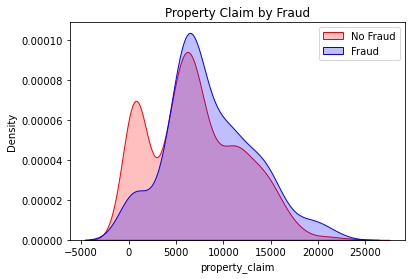

In [52]:
# property_claim vs fraud_reported
Pro=sns.kdeplot(df.property_claim[(df["fraud_reported"]=="N")],color="Red",shade=True)

Pro=sns.kdeplot(df.property_claim[(df["fraud_reported"]=="Y")],ax=Pro,color="Blue",shade=True)

Pro.legend(["No Fraud","Fraud"],loc="upper right")
Pro.set_ylabel("Density")
Pro.set_xlabel("property_claim")
Pro.set_title("Property Claim by Fraud")

#### Observation:
- Higher the property claim amount higher are the Fraud claims. 
- No Fraud claims are high when the property claim amount is low. 

Text(0.5, 1.0, 'Vehicle Claim by Fraud')

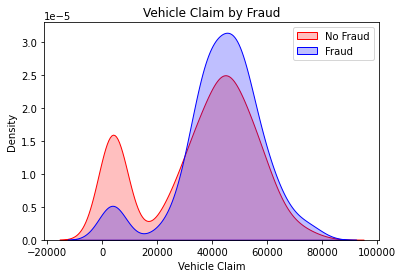

In [53]:
# vehicle_claim vs fraud_reported
Veh=sns.kdeplot(df.vehicle_claim[(df["fraud_reported"]=="N")],color="Red",shade=True)

Veh=sns.kdeplot(df.vehicle_claim[(df["fraud_reported"]=="Y")],ax=Veh,color="Blue",shade=True)

Veh.legend(["No Fraud","Fraud"],loc="upper right")
Veh.set_ylabel("Density")
Veh.set_xlabel("Vehicle Claim")
Veh.set_title("Vehicle Claim by Fraud")

#### Observation:
- Higher the amount of vehicle claim higher is risk of Fraud claims.
- Non Fraud cases have low vehicle amount value.

In [54]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='incident_type', ylabel='count'>

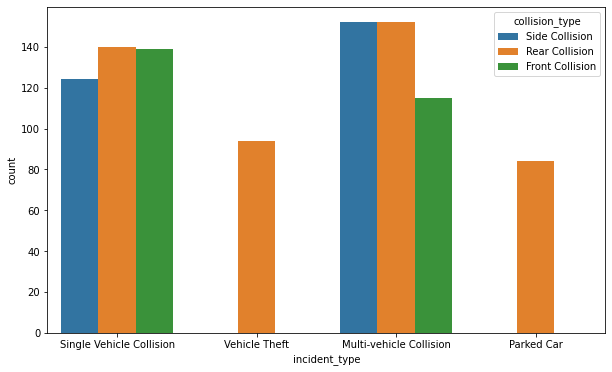

In [55]:
# incident_type vs collision_type
plt.figure(figsize=(10,6))
sns.countplot(x="incident_type",hue="collision_type",data=df)

#### Observation:
- Vehicle Theft and Parked Car incidents has only Rear Collision. 
- Multiple-vehicle Collision incidents have almost equal number of Rear and Side Collisions. 

<AxesSubplot:xlabel='incident_state', ylabel='count'>

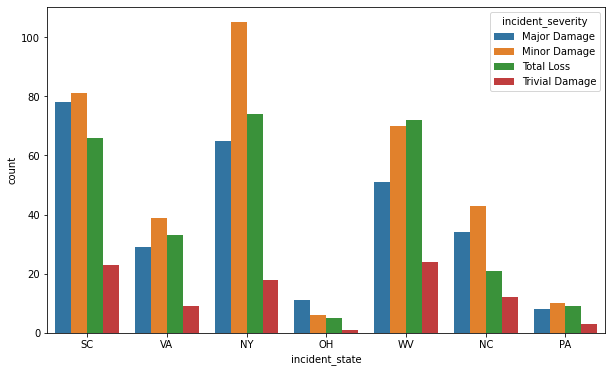

In [56]:
# incident_state vs incident_severity
plt.figure(figsize=(10,6))
sns.countplot(x="incident_state",hue="incident_severity",data=df)

#### Observation:
- Major damage incidents are mostly seen in SC state and Minor damage incidents in NY state. 
- Total loss is majorly observed in WV state. 

### C] Multivariate Analysis

<AxesSubplot:xlabel='vehicle_claim', ylabel='injury_claim'>

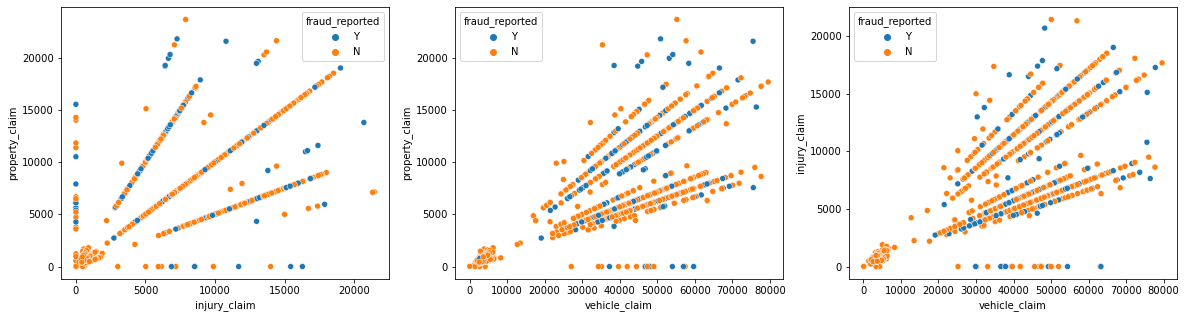

In [57]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.scatterplot(x="injury_claim",y="property_claim",hue="fraud_reported",data=df)

plt.subplot(1,3,2)
sns.scatterplot(x="vehicle_claim",y="property_claim",hue="fraud_reported",data=df)

plt.subplot(1,3,3)
sns.scatterplot(x="vehicle_claim",y="injury_claim",hue="fraud_reported",data=df)

#### Observation:
- Here we observe a positive relationship between all the three claims: injury, vehicle and property.
- Majority of these claims are not Fraud. 

## Data Preprocessing

### Creating New Columns from the Existing Attributes

In [58]:
# policy_bind_date
df["policy_Day"]=pd.to_datetime(df.policy_bind_date).dt.day
df["policy_Month"]=pd.to_datetime(df.policy_bind_date).dt.month
df["policy_Year"]=pd.to_datetime(df.policy_bind_date).dt.year
#df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

# incident_date
df["incident_Day"]=pd.to_datetime(df.incident_date).dt.day
df["incident_Month"]=pd.to_datetime(df.incident_date).dt.month
df["incident_Year"]=pd.to_datetime(df.incident_date).dt.year


### Label Encoding

In [59]:
# insured_education_level
df["insured_education_level"]=df["insured_education_level"].replace(["High School"],0)
df["insured_education_level"]=df["insured_education_level"].replace(["Associate","College"],1)
df["insured_education_level"]=df["insured_education_level"].replace(["Masters","MD"],2)
df["insured_education_level"]=df["insured_education_level"].replace(["PhD","JD"],3)

# incident_severity
df["incident_severity"]=df["incident_severity"].replace({"Trivial Damage":0,"Minor Damage":1,"Major Damage":2,"Total Loss":3})

# police_report_available
df["police_report_available"]=df["police_report_available"].replace({"NO":0,"YES":1})

# property_damage
df["property_damage"]=df["property_damage"].replace({"NO":0,"YES":1})


### Deleting Unwanted Columns

In [60]:
df.drop(["policy_number","incident_location","auto_model","policy_bind_date","incident_date"],axis=1,inplace=True)

### Encoding Target Variable - fraud_reported

In [61]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

In [62]:
df['fraud_reported'].value_counts()

1    753
0    247
Name: fraud_reported, dtype: int64

### Correlation Matrix

<AxesSubplot:>

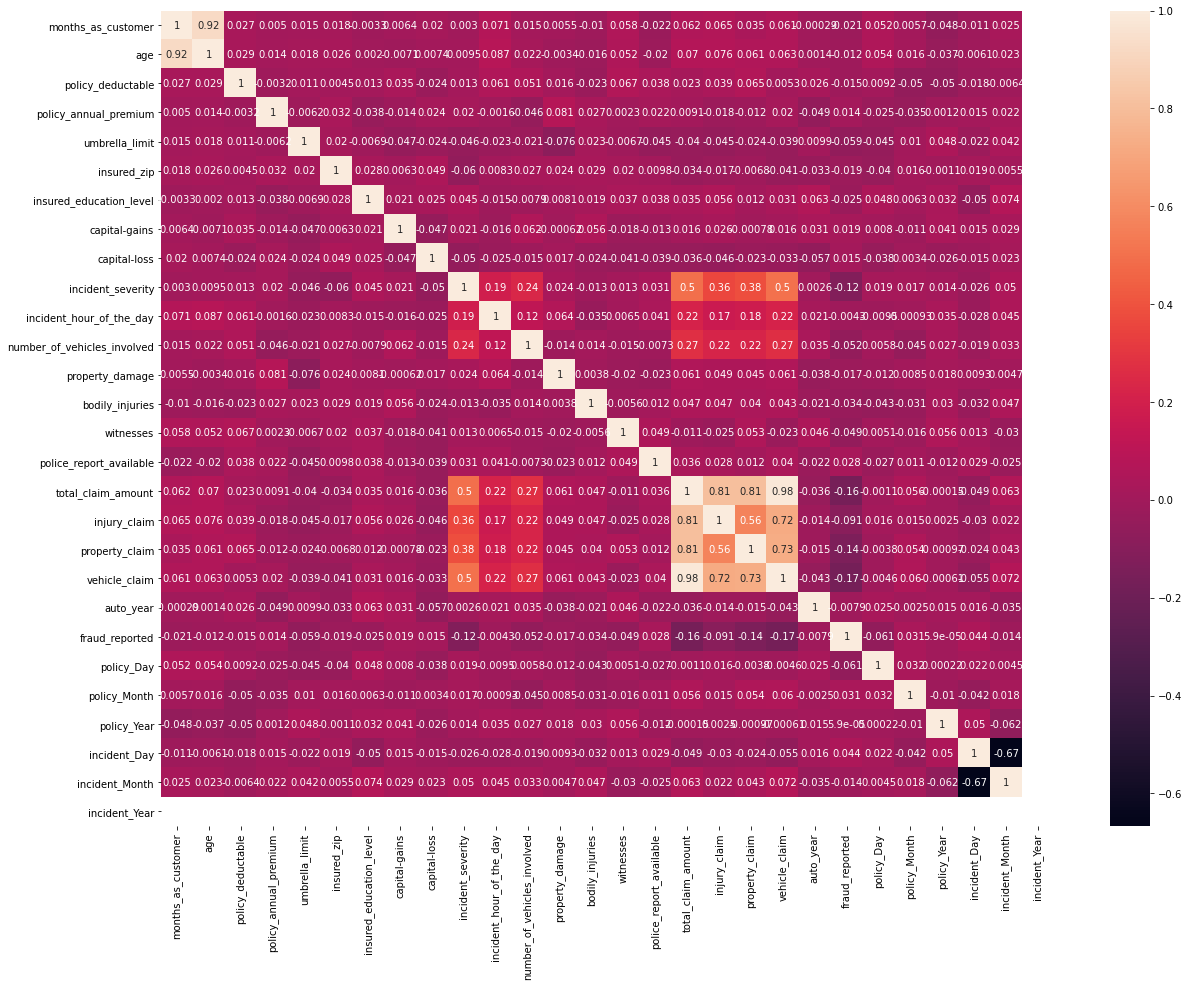

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

Observations:
- Here we dont observe any strong correlation with the target variable fraud_reported.
- However, there is strong correlation between few independent variables
 - total_claim_amount is highly correlated with vehicle_claim, property_claim and injury_claim. There has to be some relation between them. 
 - Also, total_claim_amount, injury, property and vehicle claim are strongly correlated with incident_severity, incident_hour_of_the_day and number_of_vehicles involved. 
- This may cause collinearity problem.

### OneHotEncoding All Categorical Variables

In [64]:
df=pd.get_dummies(df)
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_Day,policy_Month,policy_Year,incident_Day,incident_Month,incident_Year,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0,466132,2,53300,0,2,5,1,1,1,2,1,71610,6510,13020,52080,2004,0,17,10,2014,25,1,2015,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228,42,2000,1197.22,5000000,468176,2,0,0,1,8,1,0,0,0,0,5070,780,780,3510,2007,0,27,6,2006,21,1,2015,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,134,29,2000,1413.14,5000000,430632,3,35100,0,1,7,3,0,2,3,0,34650,7700,3850,23100,2007,1,9,6,2000,22,2,2015,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,3,48900,-62400,2,5,1,0,1,2,0,63400,6340,6340,50720,2014,0,25,5,1990,1,10,2015,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,610706,1,66000,-46000,1,20,1,0,0,1,0,6500,1300,650,4550,2009,1,6,6,2014,17,2,2015,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,

In [65]:
df.shape

(1000, 116)

- With this all the categorical columns are converted to numericals!

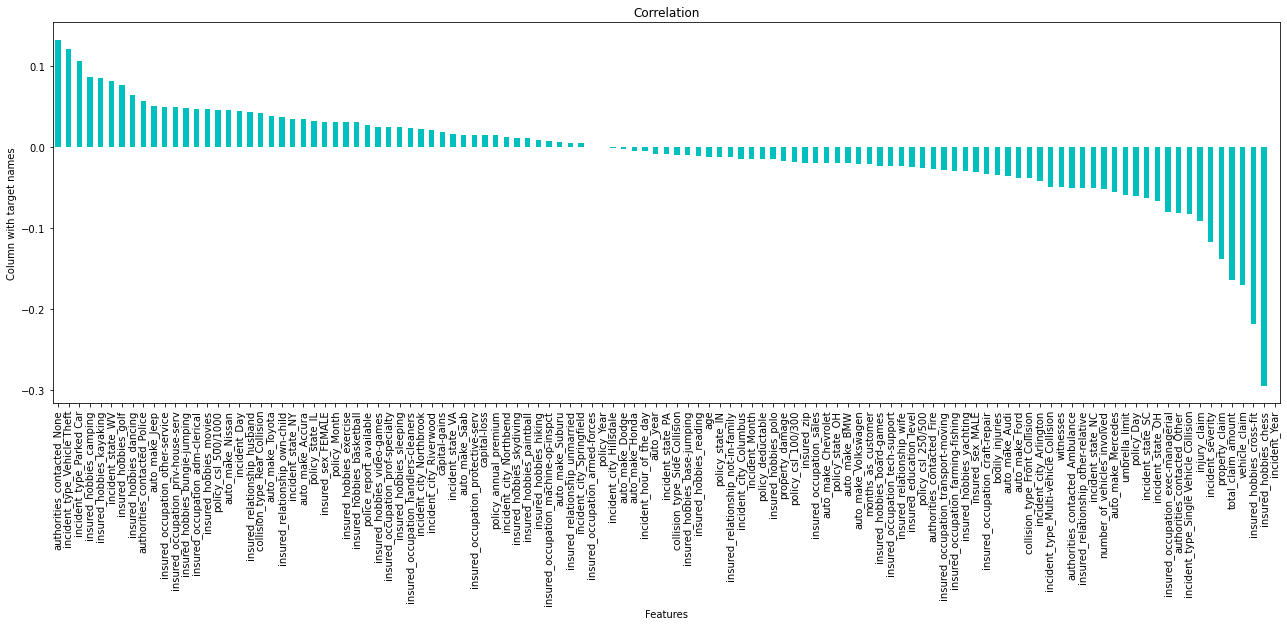

In [66]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

- From this we can say that authorities_contacted_None, incident_type_Vehicle_Theft, incident_type_Packed Car, incident_state_WV, insured_hobbies_camping are positively related with Fraud claims. 
- insured_hobbies_chess, vehicle_claim, total_claim_amount, property_claim, incident_severity, incident_type_Single vehicle collision are negatively related with Fraud claims. 

### Removing Outliers

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(df[["property_claim","total_claim_amount"]]))
df_new=df[(z<3).all(axis=1)]

#### Plotting boxplots after removing outliers

<AxesSubplot:xlabel='total_claim_amount'>

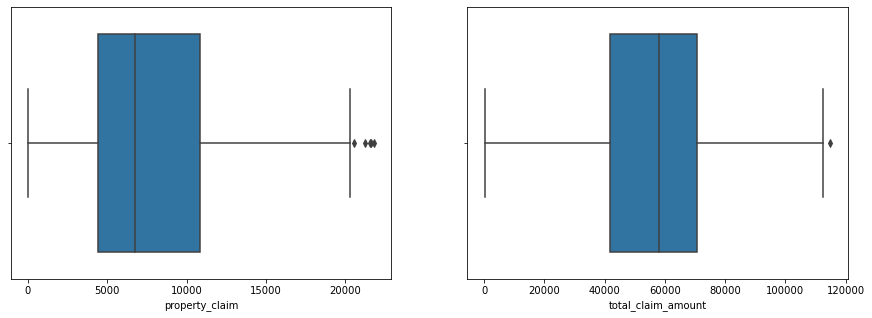

In [68]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(df_new["property_claim"])

plt.subplot(1,2,2)
sns.boxplot(df_new["total_claim_amount"])

In [69]:
df_new.shape

(999, 116)

- After removing outliers, we have 999 rows and 116 columns.

### Percentage of data loss:

In [70]:
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

0.10 %


- There is 0.10% of data loss with the outlier removal. To some extent outliers are removed.

### Creating X an Y Split

In [71]:
x=df_new.drop("fraud_reported",axis=1)
y=df_new["fraud_reported"]

In [72]:
x.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_Day,policy_Month,policy_Year,incident_Day,incident_Month,incident_Year,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0,466132,2,53300,0,2,5,1,1,1,2,1,71610,6510,13020,52080,2004,17,10,2014,25,1,2015,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228,42,2000,1197.22,5000000,468176,2,0,0,1,8,1,0,0,0,0,5070,780,780,3510,2007,27,6,2006,21,1,2015,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,134,29,2000,1413.14,5000000,430632,3,35100,0,1,7,3,0,2,3,0,34650,7700,3850,23100,2007,9,6,2000,22,2,2015,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,3,48900,-62400,2,5,1,0,1,2,0,63400,6340,6340,50720,2014,25,5,1990,1,10,2015,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,610706,1,66000,-46000,1,20,1,0,0,1,0,6500,1300,650,4550,2009,6,6,2014,17,2,2015,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0

### Treating Imbalanced Data

In [73]:
# Doing over sampling
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [74]:
# checking value counts for target variable after balancing data
y.value_counts()

1    752
0    752
Name: fraud_reported, dtype: int64

- Now, our dataset target variable is balanced and model performance will be better..

### Checking and Removing Skewness

In [75]:
cols=list(x.select_dtypes(include='int64').columns)
for col in cols:
    print(col,":",x[col].skew())

months_as_customer : 0.2960244263346377
age : 0.43670541563711446
policy_deductable : 0.4468734760229157
umbrella_limit : 1.8017783059361592
insured_zip : 0.80018753051062
insured_education_level : -0.09523056314119073
capital-gains : 0.4984932713254497
capital-loss : -0.32111017118455976
incident_severity : -0.1453059123344182
incident_hour_of_the_day : -0.04614515168554423
number_of_vehicles_involved : 0.5287839943152375
property_damage : 1.315681328045041
bodily_injuries : 0.1892303239936104
witnesses : 0.10533838670547516
police_report_available : 1.184816603427749
total_claim_amount : -0.7665176431426683
injury_claim : 0.19685865149966011
property_claim : 0.3201933056337113
vehicle_claim : -0.8044791345144356
auto_year : -0.011750543628543188
policy_Day : -0.0018053779610881554
policy_Month : 0.05063086623915676
policy_Year : 0.06282565772994804
incident_Day : 0.13066158491599816
incident_Month : 1.4071554146927077
incident_Year : 0


- We can ignore the skewness of the categorical columns. The skewness of numerical columns is also in the range. 

### Scaling

- There is a difference between the range of values for many independent variables. Hence, we are scaling.

In [76]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_scaled=SS.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_Day,policy_Month,policy_Year,incident_Day,incident_Month,incident_Year,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,1.103452,1.038441,-0.248954,0.655640,-0.484742,-0.513824,0.408497,1.023076,0.997458,0.316643,-1.004422,-0.842846,1.853801,0.132503,0.578120,1.753819,0.678495,-0.259345,1.158757,0.711073,-0.148565,0.156624,1.147815,1.810892,1.256041,-0.739892,0.0,-0.596805,-0.550720,1.588159,-0.607056,1.650083,-0.527091,-0.884302,1.296506,-0.212533,-0.225861,4.365012,-0.233877,-0.19298,-0.19298,-0.261116,-0.22259,-0.224231,-0.247785,-0.209092,-0.238583,-0.237023,-0.224231,-0.183513,-0.152083,-0.185440,-0.200276,-0.194826,-0.202065,-0.1736,-0.171557,-0.200276,-0.194826,-0.19298,-0.19298,-0.194826,-0.196657,-0.181568,-0.214236,-0.187349,5.973519,-0.187349,-0.191119,2.686741,-0.377964,-0.384827,-0.384827,-0.332841,-0.362875,-0.761467,-0.247785,1.421295,-0.259661,-0.489797,-0.744123,1.912158,-0.409514,-0.443283,-0.256731,-0.436824,1.954613,-0.293122,-0.490840,-0.127343,-0.142663,2.007511,-0.286382,-0.427071,-0.353421,2.908457,-0.345033,-0.337749,-0.303693,-0.334072,-0.348642,-0.22259,-0.232292,-0.225861,-0.233877,-0.240136,-0.238583,-0.194826,-0.217609,-0.215928,-0.233877,4.060588,-0.241681,-0.22094,-0.22259
1,0.199151,0.350921,1.475515,-0.268242,1.653801,-0.485065,0.408497,-0.903717,0.997458,-0.865072,-0.545954,-0.842846,-0.539432,-1.128790,-1.332852,-0.570184,-2.093688,-1.520292,-1.541893,-2.116840,0.379251,1.347536,-0.118275,0.652414,0.849743,-0.739892,0.0,-0.596805,1.8

- Now, all the features values are scaled and the model building will not be biased.

## Building the Model

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

### Finding Best Random_State

In [78]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAcc," on Random State ",maxRS)

Best Accuracy is  0.9069767441860465  on Random State  96


Using the best Random State to create new train_test_split.

In [79]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=maxRS)

In [80]:
#Importing the packages to build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 1. LogisticRegression

In [81]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[133  19]
 [  9 140]] 

Accuracy Score: 90.69767441860465
              precision    recall  f1-score   support

           0       0.94      0.88      0.90       152
           1       0.88      0.94      0.91       149

    accuracy                           0.91       301
   macro avg       0.91      0.91      0.91       301
weighted avg       0.91      0.91      0.91       301



#### 2. AdaBoostClassifier

In [82]:
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred=Ada.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[135  17]
 [ 16 133]] 

Accuracy Score: 89.03654485049833
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       152
           1       0.89      0.89      0.89       149

    accuracy                           0.89       301
   macro avg       0.89      0.89      0.89       301
weighted avg       0.89      0.89      0.89       301



#### 3. DecisionTreeClassifier

In [83]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[134  18]
 [ 30 119]] 

Accuracy Score: 84.0531561461794
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       152
           1       0.87      0.80      0.83       149

    accuracy                           0.84       301
   macro avg       0.84      0.84      0.84       301
weighted avg       0.84      0.84      0.84       301



#### 4. RandomForestClassifier

In [84]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[132  20]
 [ 12 137]] 

Accuracy Score: 89.3687707641196
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       152
           1       0.87      0.92      0.90       149

    accuracy                           0.89       301
   macro avg       0.89      0.89      0.89       301
weighted avg       0.89      0.89      0.89       301



#### 5. SVC

In [85]:
SC=SVC()
SC.fit(x_train,y_train)
pred=SC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[126  26]
 [  2 147]] 

Accuracy Score: 90.69767441860465
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       152
           1       0.85      0.99      0.91       149

    accuracy                           0.91       301
   macro avg       0.92      0.91      0.91       301
weighted avg       0.92      0.91      0.91       301



- Here, we observe that LogisticRegression is giving the highest accuracy score. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation score for LogisticRegression

0.8292004429678848


In [88]:
print(cross_val_score(DTC,x,y,cv=5).mean()) #cross validation score for DecisionTreeClassifier

0.8098848283499447


In [89]:
print(cross_val_score(RFC,x,y,cv=5).mean()) #cross validation score for RandomForestClassifier

0.8238870431893688


In [90]:
print(cross_val_score(SC,x,y,cv=5).mean()) #cross validation score for SVC

0.8332115171650056


In [91]:
print(cross_val_score(Ada,x,y,cv=5).mean()) #cross validation score for AdaBoostClassifier

0.8418250276854927


- Here we observe that after doing cross validation RandomForestClassifier is giving the least difference. We can definitely consider it as our best model.

## Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [92]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [93]:
parameters1={'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'n_estimators':[40,50,60,100],
           'max_depth':[2,3,4,5,6]}

In [94]:
GCVRFC=GridSearchCV(RandomForestClassifier(),parameters1,cv=5)
GCVRFC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [40, 50, 60, 100]})

In [95]:
GCVRFC.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [104]:
Final_modRFC=RandomForestClassifier(criterion="gini",max_depth=6,max_features='auto',n_estimators=60)
Final_modRFC.fit(x_train,y_train)
pred=Final_modRFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[140  12]
 [ 20 129]] 

Accuracy Score: 89.3687707641196
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       152
           1       0.91      0.87      0.89       149

    accuracy                           0.89       301
   macro avg       0.89      0.89      0.89       301
weighted avg       0.89      0.89      0.89       301



- After Hyper Parameter tuning, the improved score of the best model RandomForestClassifier is 89%

### Plotting AUC_ROC curve

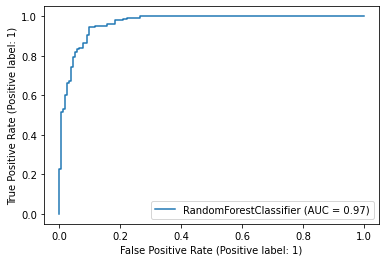

In [105]:
metrics.plot_roc_curve(Final_modRFC, x_test, y_test)

- The AUC score is 0.97

## Saving the Model

In [106]:
import joblib
joblib.dump(Final_modRFC,"Insurance_FraudClaim.pkl")

['Insurance_FraudClaim.pkl']